<a href="https://colab.research.google.com/github/Svignesh16/Data-Science-assignment-for-trader-behaviour/blob/main/ds_Sadamanti_Vignesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load trader data
trader_df = pd.read_csv('/content/ds_Sadamanti_Vignesh/csv_files/historical_data.csv')  # Change path to your file location

# Load sentiment data
sentiment_df = pd.read_csv('/content/ds_Sadamanti_Vignesh/csv_files/fear_greed_index.csv')  # Change path to your file location

print(trader_df.head())
print(sentiment_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [ ]:
# Convert Date columns to datetime for merging
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge on Date
merged_df = pd.merge(trader_df, sentiment_df, left_on='date', right_on='Date')
print(merged_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL  ... Crossed       Fee      Trade ID     Timestamp      date_x  \
0         0.0  ...    Tr

In [ ]:
# Group by sentiment and compute mean closedPnL (profit/loss)
sentiment_profit = merged_df.groupby('classification')['Closed PnL'].mean()
print(sentiment_profit)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


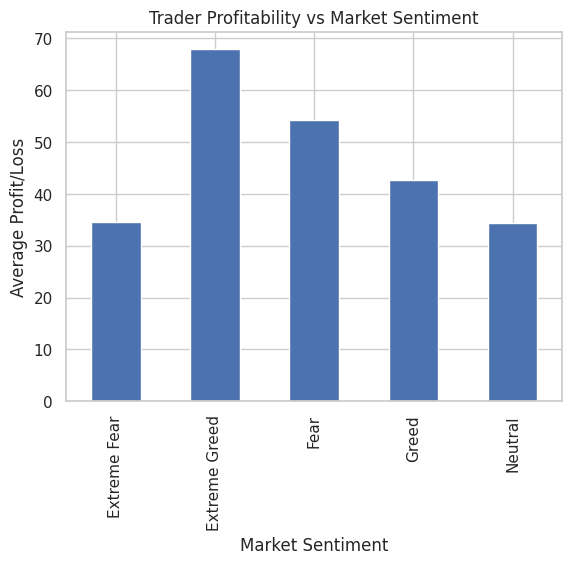

In [ ]:
import matplotlib.pyplot as plt

sentiment_profit.plot(kind='bar')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Profit/Loss')
plt.title('Trader Profitability vs Market Sentiment')
plt.show()


In [ ]:
# Group by sentiment and compute mean closedPnL (profit/loss)
sentiment_profit = merged_df.groupby('classification')['Closed PnL'].mean()
print(sentiment_profit)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


In [ ]:
# Example: Calculating average profit and leverage by sentiment
fear_greed_stats = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'sum']
})

print(fear_greed_stats)

               Closed PnL              
                     mean           sum
classification                         
Extreme Fear    34.537862  7.391102e+05
Extreme Greed   67.892861  2.715171e+06
Fear            54.290400  3.357155e+06
Greed           42.743559  2.150129e+06
Neutral         34.307718  1.292921e+06


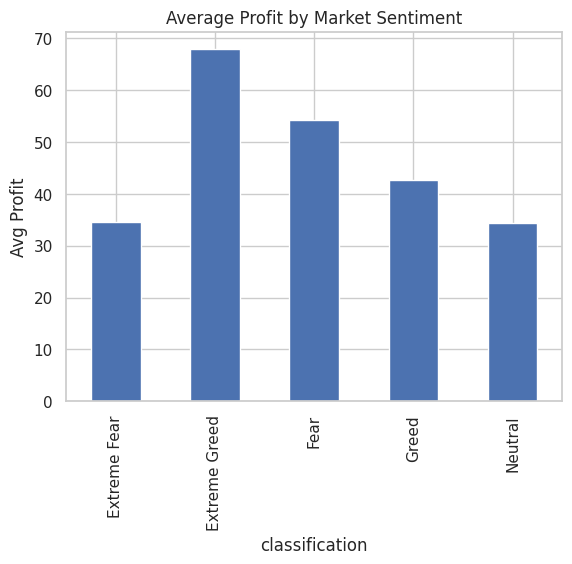

In [ ]:
import matplotlib.pyplot as plt

fear_greed_stats[('Closed PnL', 'mean')].plot(kind='bar')
plt.title('Average Profit by Market Sentiment')
plt.ylabel('Avg Profit')
plt.show()

In [ ]:
merged_df['win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['win'].mean()
print(win_rate)

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


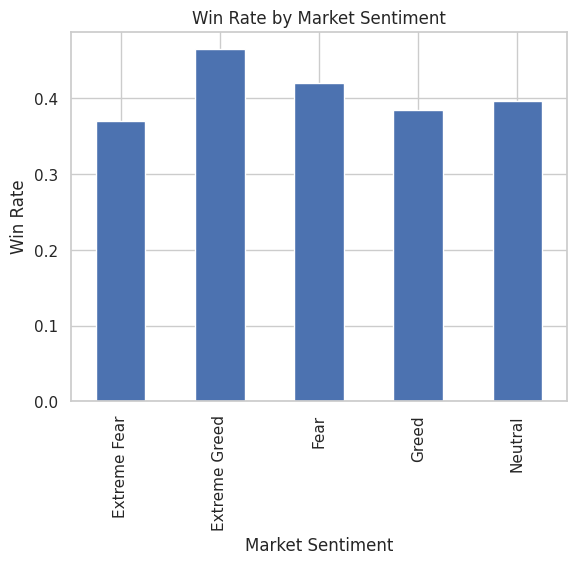

In [ ]:
import matplotlib.pyplot as plt

win_rate.plot(kind='bar')
plt.title('Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win Rate')
plt.show()